In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data/datasets/AEP_hourly.csv')
df

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0
...,...,...
121268,2018-01-01 20:00:00,21089.0
121269,2018-01-01 21:00:00,20999.0
121270,2018-01-01 22:00:00,20820.0
121271,2018-01-01 23:00:00,20415.0


In [4]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0
...,...,...
121268,2018-01-01 20:00:00,21089.0
121269,2018-01-01 21:00:00,20999.0
121270,2018-01-01 22:00:00,20820.0
121271,2018-01-01 23:00:00,20415.0


In [5]:
    # Sort in ascending order (oldest to newest)
df = df.sort_values(by='Datetime')
df = df[:-1]
df

,Datetime,AEP_MW
2183,2004-10-01 01:00:00,12379.0
2184,2004-10-01 02:00:00,11935.0
2185,2004-10-01 03:00:00,11692.0
2186,2004-10-01 04:00:00,11597.0
2187,2004-10-01 05:00:00,11681.0
...,...,...
116156,2018-08-02 19:00:00,18118.0
116157,2018-08-02 20:00:00,17673.0
116158,2018-08-02 21:00:00,17303.0
116159,2018-08-02 22:00:00,17001.0


In [6]:
# Tambahkan kolom waktu
df['Year'] = df['Datetime'].dt.year
df['Month'] = df['Datetime'].dt.month
df['Day'] = df['Datetime'].dt.day
df['Hour'] = df['Datetime'].dt.hour
df['DayOfWeek'] = df['Datetime'].dt.dayofweek  # 0 = Monday, 6 = Sunday

In [7]:
df

,Datetime,AEP_MW,Year,Month,Day,Hour,DayOfWeek
2183,2004-10-01 01:00:00,12379.0,2004,10,1,1,4
2184,2004-10-01 02:00:00,11935.0,2004,10,1,2,4
2185,2004-10-01 03:00:00,11692.0,2004,10,1,3,4
2186,2004-10-01 04:00:00,11597.0,2004,10,1,4,4
2187,2004-10-01 05:00:00,11681.0,2004,10,1,5,4
...,...,...,...,...,...,...,...
116156,2018-08-02 19:00:00,18118.0,2018,8,2,19,3
116157,2018-08-02 20:00:00,17673.0,2018,8,2,20,3
116158,2018-08-02 21:00:00,17303.0,2018,8,2,21,3
116159,2018-08-02 22:00:00,17001.0,2018,8,2,22,3


C:\Users\71486\AppData\Local\Temp\ipykernel_31220\2025028191.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_avg = df.resample('Y', on='Datetime')['AEP_MW'].mean()


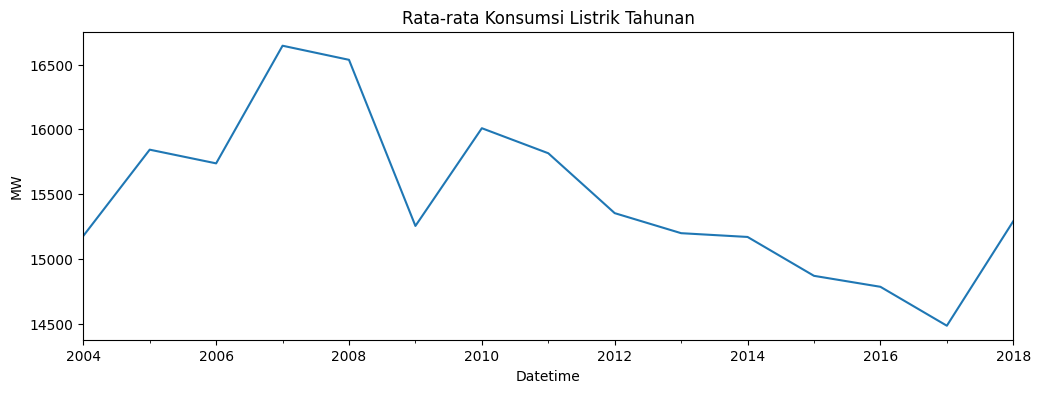

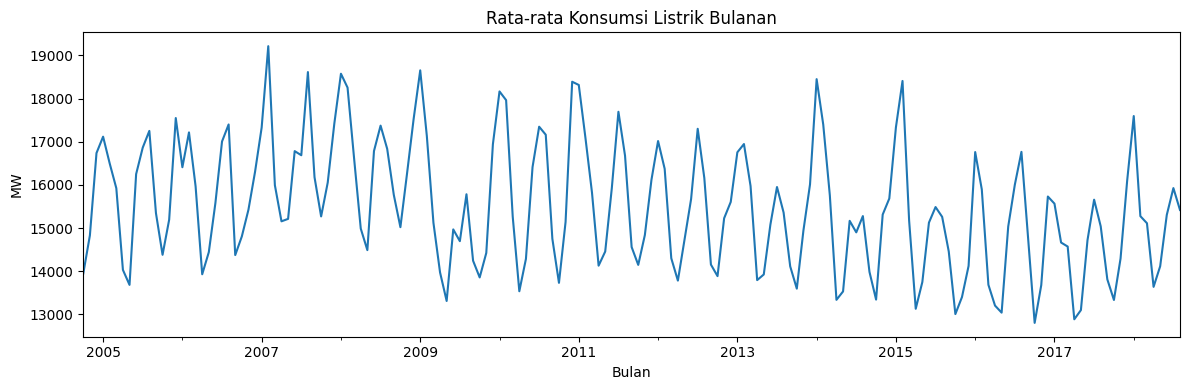

In [41]:


# ===== Trend tahunan, bulanan, harian =====
daily_avg = df.resample('D', on='Datetime')['AEP_MW'].mean()
monthly_avg = df.resample('ME', on='Datetime')['AEP_MW'].mean()
yearly_avg = df.resample('Y', on='Datetime')['AEP_MW'].mean()

# Plot tren tahunan
plt.figure(figsize=(12, 4))
yearly_avg.plot(title='Rata-rata Konsumsi Listrik Tahunan')
plt.ylabel('MW')
plt.grid(False)
plt.show()

# Plot tren musiman bulanan
# Plot tren musiman bulanan
plt.figure(figsize=(12, 4))
monthly_avg.plot(title='Rata-rata Konsumsi Listrik Bulanan')
plt.xlabel('Bulan')
plt.ylabel('MW')
plt.grid(False)
plt.tight_layout()
plt.show()


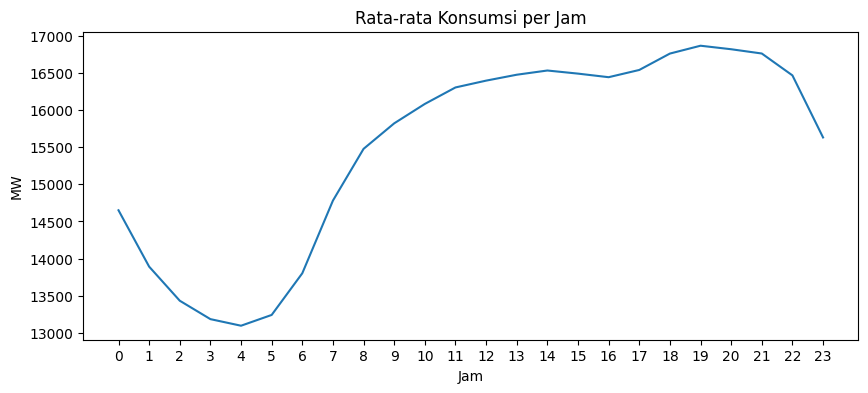

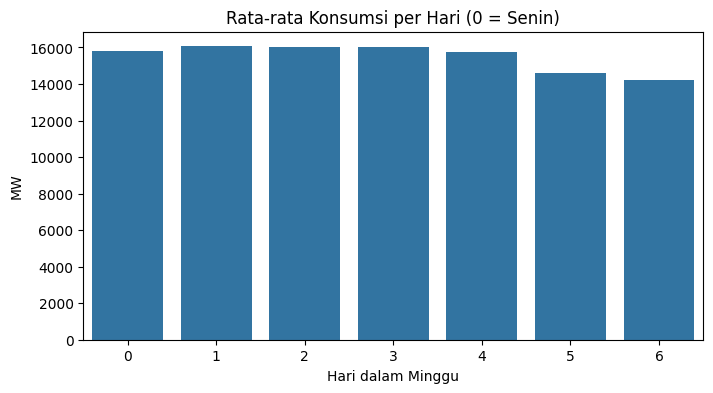

Jumlah outlier terdeteksi: 667
                 Datetime   AEP_MW  Year  Month  Day  Hour  DayOfWeek
272   2004-12-20 09:00:00  22577.0  2004     12   20     9          0
10540 2005-01-18 08:00:00  22940.0  2005      1   18     8          1
10541 2005-01-18 09:00:00  22886.0  2005      1   18     9          1
10396 2005-01-24 08:00:00  22652.0  2005      1   24     8          0
10397 2005-01-24 09:00:00  22639.0  2005      1   24     9          0


In [9]:

# ===== Pola Harian dan Mingguan =====
hourly_pattern = df.groupby('Hour')['AEP_MW'].mean()
daily_pattern = df.groupby('DayOfWeek')['AEP_MW'].mean()

# Create a range of hours for the x-axis
hours = range(24)

plt.figure(figsize=(10, 4))
sns.lineplot(x=hourly_pattern.index, y=hourly_pattern.values)
plt.title('Rata-rata Konsumsi per Jam')
plt.xlabel('Jam')
plt.ylabel('MW')
plt.xticks(hours)  # Rotate x-axis labels for better readability
plt.grid(False)
plt.show()


# Plot pola mingguan
plt.figure(figsize=(8, 4))
sns.barplot(x=daily_pattern.index, y=daily_pattern.values)
plt.title('Rata-rata Konsumsi per Hari (0 = Senin)')
plt.xlabel('Hari dalam Minggu')
plt.ylabel('MW')
plt.grid(False)
plt.show()

# ===== Deteksi Outlier (IQR method) =====
Q1 = df['AEP_MW'].quantile(0.25)
Q3 = df['AEP_MW'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['AEP_MW'] < (Q1 - 1.5 * IQR)) | (df['AEP_MW'] > (Q3 + 1.5 * IQR))]

print(f"Jumlah outlier terdeteksi: {len(outliers)}")
print(outliers.head())


In [10]:
print(outliers['Year'].value_counts())
print(outliers['Month'].value_counts())
print(outliers['Day'].value_counts())


Year
2007    195
2008     73
2011     67
2010     65
2006     55
2005     45
2014     44
2009     42
2012     29
2015     29
2013     17
2018      5
2004      1
Name: count, dtype: int64
Month
8     206
7     182
1     118
2      69
6      47
9      24
12     19
10      1
3       1
Name: count, dtype: int64
Day
2     43
6     37
7     34
16    34
9     33
21    29
8     28
28    28
29    28
17    27
18    26
1     26
3     25
20    24
23    22
22    22
5     20
26    20
19    20
24    19
31    18
10    16
15    16
13    13
12    13
4     12
25     9
27     8
30     7
14     7
11     3
Name: count, dtype: int64


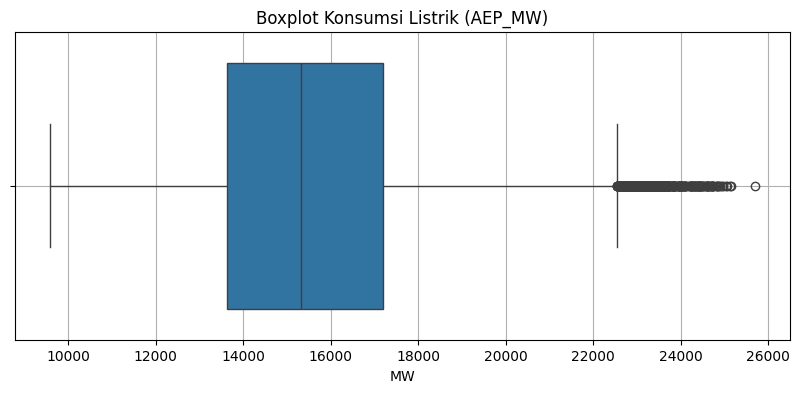

In [11]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['AEP_MW'])
plt.title('Boxplot Konsumsi Listrik (AEP_MW)')
plt.xlabel('MW')
plt.grid(True)
plt.show()


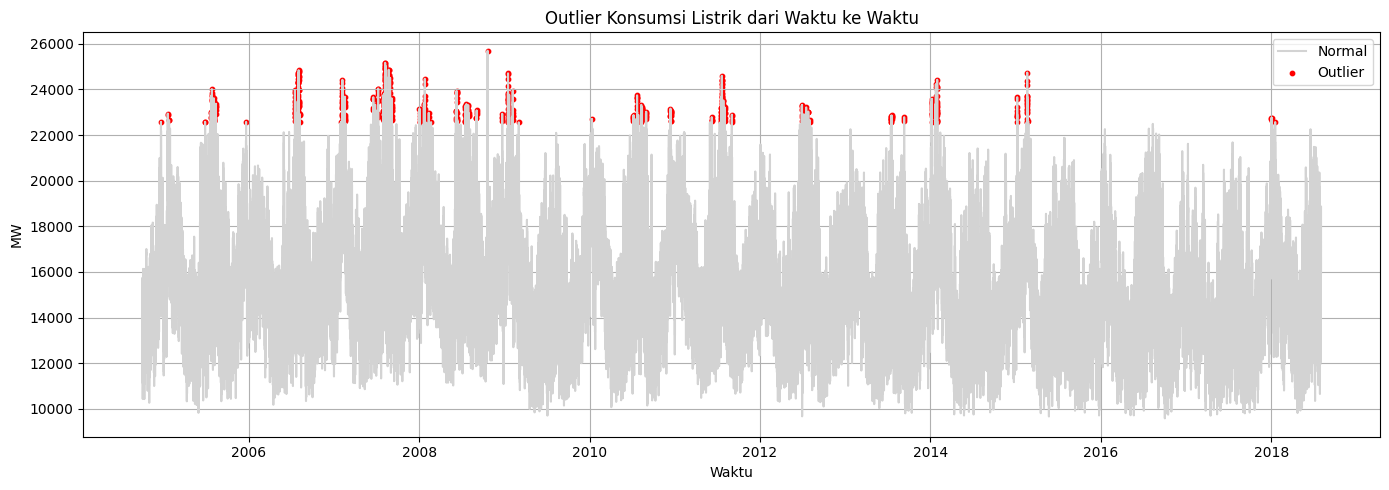

In [12]:
plt.figure(figsize=(14, 5))

# Plot semua data
plt.plot(df['Datetime'], df['AEP_MW'], color='lightgray', label='Normal')

# Plot outlier dengan warna merah
plt.scatter(outliers['Datetime'], outliers['AEP_MW'], color='red', label='Outlier', s=10)

plt.title('Outlier Konsumsi Listrik dari Waktu ke Waktu')
plt.xlabel('Waktu')
plt.ylabel('MW')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [13]:
outliers.max()

Datetime     2018-01-18 08:00:00
AEP_MW                   25695.0
Year                        2018
Month                         12
Day                           31
Hour                          23
DayOfWeek                      5
dtype: object

In [14]:
carbon_tax_rate = 50  # USD per ton CO2
emission_factor_coal = 0.9  # ton CO2 per MW

# Emisi dari skema saat ini (tidak diketahui distribusi konsumsi → pakai default produksi 47%)
df['Coal_MW_current'] = df['AEP_MW'] * 0.47
df['CO2_ton_current'] = df['Coal_MW_current'] * emission_factor_coal
df['Carbon_Tax_current'] = df['CO2_ton_current'] * carbon_tax_rate

# Skema baru: hanya 10% dari konsumsi diambil dari coal
df['Coal_MW_new'] = df['AEP_MW'] * 0.10
df['CO2_ton_new'] = df['Coal_MW_new'] * emission_factor_coal
df['Carbon_Tax_new'] = df['CO2_ton_new'] * carbon_tax_rate

# Simulasi penghematan
df['Tax_Saving'] = df['Carbon_Tax_current'] - df['Carbon_Tax_new']

# Ringkasan tahunan
df['Year'] = df['Datetime'].dt.year
summary = df.groupby('Year')[['Carbon_Tax_current', 'Carbon_Tax_new', 'Tax_Saving']].sum().round(2)
summary.rename(columns={
    'Carbon_Tax_current': 'Carbon Tax (47% coal)',""
    'Carbon_Tax_new': 'Carbon Tax (10% coal)',
    'Tax_Saving': 'Total Tax Saving ($)'
}, inplace=True)

summary


,Carbon Tax (47% coal),Carbon Tax (10% coal),Total Tax Saving ($)
Year,,,
2004,7.080989e+08,150659343.0,5.574396e+08
2005,2.934624e+09,624388113.0,2.310236e+09
2006,2.915033e+09,620219745.0,2.294813e+09
2007,3.083278e+09,656016561.0,2.427261e+09
2008,3.071507e+09,653512095.0,2.417995e+09
2009,2.825545e+09,601179795.0,2.224365e+09
2010,2.964965e+09,630843664.5,2.334122e+09
2011,2.929511e+09,623300314.5,2.306211e+09
2012,2.851320e+09,606663774.0,2.244656e+09


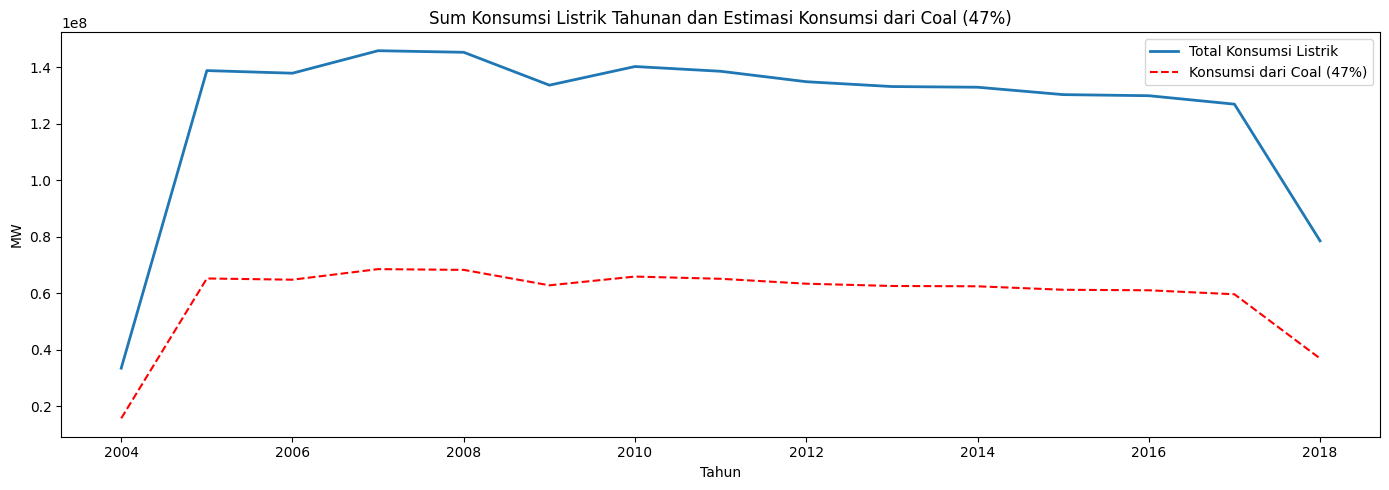

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data (asumsi sudah dalam DataFrame df)
df['Datetime'] = pd.to_datetime(df['Datetime'])
df['Year'] = df['Datetime'].dt.year

# Hitung total konsumsi per tahun
yearly_consumption = df.groupby('Year')['AEP_MW'].sum()

# Estimasi konsumsi dari coal (47% dari konsumsi aktual)
yearly_coal = yearly_consumption * 0.47

# Plot total konsumsi dan konsumsi dari coal
plt.figure(figsize=(14, 5))
plt.plot(yearly_consumption.index, yearly_consumption.values, label='Total Konsumsi Listrik', linewidth=2)
plt.plot(yearly_coal.index, yearly_coal.values, label='Konsumsi dari Coal (47%)', linestyle='--', color='red')

plt.title('Sum Konsumsi Listrik Tahunan dan Estimasi Konsumsi dari Coal (47%)')
plt.xlabel('Tahun')
plt.ylabel('MW')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()


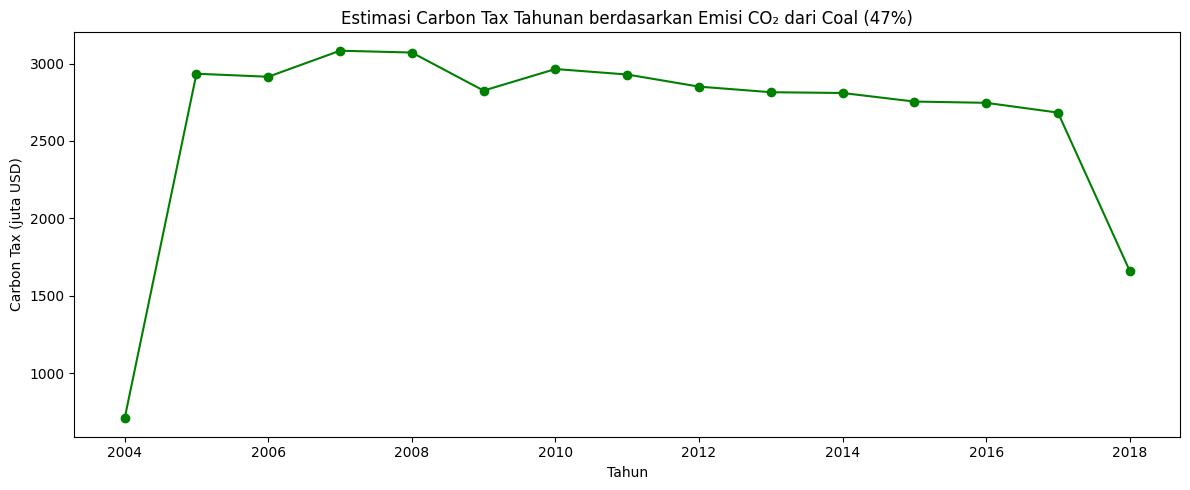

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Pastikan kolom datetime sudah benar
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Parameter emisi dan tarif pajak karbon
emission_factor_coal = 0.9       # ton CO2 per MW
coal_share = 0.47                # 47% dari konsumsi dianggap berasal dari coal
carbon_tax_rate = 50             # USD per ton CO2

# Estimasi emisi CO2 dari konsumsi per jam (hanya dari porsi coal)
df['Coal_MW'] = df['AEP_MW'] * coal_share
df['CO2_ton'] = df['Coal_MW'] * emission_factor_coal

# Hitung carbon tax per jam
df['Carbon_Tax_USD'] = df['CO2_ton'] * carbon_tax_rate

# Tambahkan kolom tahun
df['Year'] = df['Datetime'].dt.year

# Agregasi total pajak per tahun
tax_per_year = df.groupby('Year')['Carbon_Tax_USD'].sum()

# Konversi dari USD ke juta USD
tax_per_year_million = tax_per_year / 1e6  # dari dollar ke juta dollar

# Plot grafik dengan satuan juta USD
plt.figure(figsize=(12, 5))
plt.plot(tax_per_year_million.index, tax_per_year_million.values, marker='o', color='green')
plt.title('Estimasi Carbon Tax Tahunan berdasarkan Emisi CO₂ dari Coal (47%)')
plt.xlabel('Tahun')
plt.ylabel('Carbon Tax (juta USD)')
plt.grid(False)
plt.tight_layout()
plt.show()



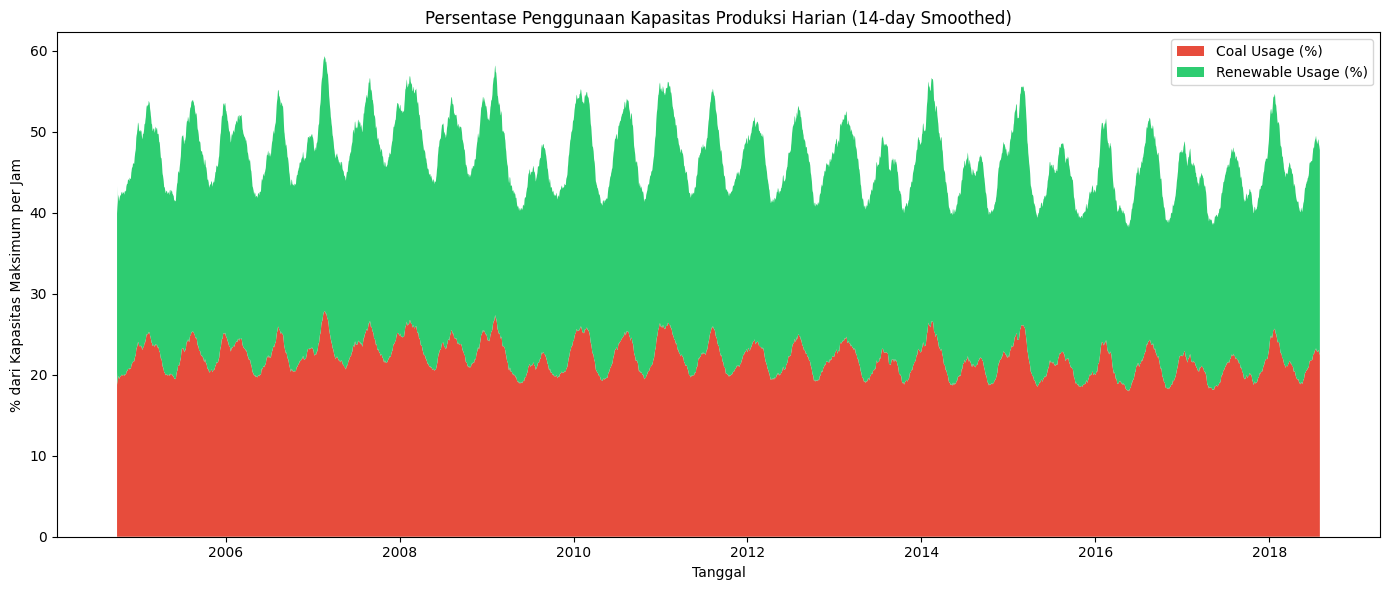

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

# Pastikan datetime dalam format datetime
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Kapasitas produksi maksimum per jam
max_capacity = 33010  # MW

# Hitung % konsumsi terhadap kapasitas
df['Utilization_%'] = (df['AEP_MW'] / max_capacity) * 100
df['Coal_Usage_%'] = df['Utilization_%'] * 0.47
df['Renewable_Usage_%'] = df['Utilization_%'] * 0.53

# (Optional) Agregasi ke harian rata-rata (biar nggak terlalu rame)
df['Date'] = df['Datetime'].dt.date
daily_util = df.groupby('Date')[['Coal_Usage_%', 'Renewable_Usage_%']].mean()

# Gunakan rolling mean 14 hari untuk menghaluskan grafik
daily_util_smooth = daily_util.rolling(window=30, min_periods=1).mean()

# Plot area chart persentase dengan smoothing
plt.figure(figsize=(14, 6))
plt.stackplot(
    pd.to_datetime(daily_util_smooth.index),
    daily_util_smooth['Coal_Usage_%'],
    daily_util_smooth['Renewable_Usage_%'],
    labels=['Coal Usage (%)', 'Renewable Usage (%)'],
    colors=['#e74c3c', '#2ecc71']
)

plt.title('Persentase Penggunaan Kapasitas Produksi Harian (14-day Smoothed)')
plt.xlabel('Tanggal')
plt.ylabel('% dari Kapasitas Maksimum per Jam')
plt.legend(loc='upper right')
plt.grid(False)
plt.tight_layout()
plt.show()



In [18]:
max_renewable_capacity = 0.53 * 33010           # 53% dari total kapasitas
usable_renewable_capacity = max_renewable_capacity * 0.90  # hanya 90% yang bisa digunakan

# Untuk setiap jam, berapa yang bisa disuplai oleh renewable?
df['From_Renewable'] = df['AEP_MW'].clip(upper=usable_renewable_capacity)

# Sisanya harus dari coal
df['From_Coal'] = df['AEP_MW'] - df['From_Renewable']
df['From_Coal'] = df['From_Coal'].clip(lower=0)  # tidak boleh negatif


In [19]:
df['Coal_Share_%'] = (df['From_Coal'] / df['AEP_MW']) * 100


In [20]:
df['Date'] = df['Datetime'].dt.date
daily_avg = df.groupby('Date')['Coal_Share_%'].mean()


In [21]:
# 7-day rolling average untuk memperhalus grafik
daily_avg_smooth = daily_avg.rolling(window=90).mean()


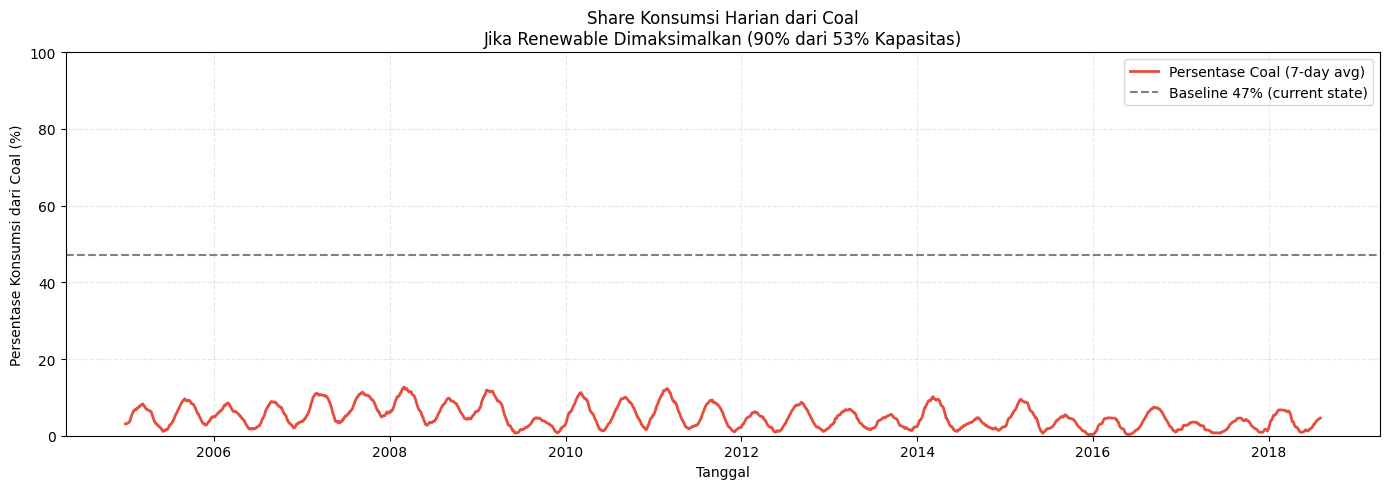

In [22]:
plt.figure(figsize=(14, 5))
plt.plot(pd.to_datetime(daily_avg.index), daily_avg_smooth, label='Persentase Coal (7-day avg)', color='#e74c3c', linewidth=2)

# Tambahkan baseline 47%
plt.axhline(47, color='gray', linestyle='--', label='Baseline 47% (current state)')

plt.title('Share Konsumsi Harian dari Coal\nJika Renewable Dimaksimalkan (90% dari 53% Kapasitas)')
plt.xlabel('Tanggal')
plt.ylabel('Persentase Konsumsi dari Coal (%)')
plt.ylim(0, 100)  # batas 0–100%
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


In [23]:
# Constants
total_capacity = 33010  # MW
renewable_share = 0.53
coal_share = 0.47
carbon_tax_rate = 50  # USD per ton
emission_factor_coal = 0.9  # ton CO2 per MW

# Renewable capacity yang bisa digunakan (90% dari 53%)
max_renewable_capacity = total_capacity * renewable_share
usable_renewable_capacity = max_renewable_capacity * 0.90

# Per jam: seberapa banyak dari konsumsi bisa ditutup oleh renewable
df['From_Renewable'] = df['AEP_MW'].clip(upper=usable_renewable_capacity)
df['From_Coal'] = df['AEP_MW'] - df['From_Renewable']
df['From_Coal'] = df['From_Coal'].clip(lower=0)

# Carbon Tax Baru (Post Shift)
df['CO2_ton_new'] = df['From_Coal'] * emission_factor_coal
df['Carbon_Tax_new'] = df['CO2_ton_new'] * carbon_tax_rate

# Carbon Tax Baseline (47% dari konsumsi dianggap dari coal)
df['Coal_MW_baseline'] = df['AEP_MW'] * 0.47
df['CO2_ton_baseline'] = df['Coal_MW_baseline'] * emission_factor_coal
df['Carbon_Tax_baseline'] = df['CO2_ton_baseline'] * carbon_tax_rate

# Agregasi per tahun
df['Year'] = df['Datetime'].dt.year
summary = df.groupby('Year')[['Carbon_Tax_baseline', 'Carbon_Tax_new']].sum()
summary['Tax_Saving'] = summary['Carbon_Tax_baseline'] - summary['Carbon_Tax_new']
summary = summary.round(2)

# Rename kolom untuk presentasi
summary.rename(columns={
    'Carbon_Tax_baseline': 'Carbon Tax (47% coal)',
    'Carbon_Tax_new': 'Carbon Tax (Post-Shift)',
    'Tax_Saving': 'Penghematan ($)'
}, inplace=True)

print(summary)

      Carbon Tax (47% coal)  Carbon Tax (Post-Shift)  Penghematan ($)
Year                                                                 
2004           7.080989e+08             5.510521e+07     6.529937e+08
2005           2.934624e+09             4.259229e+08     2.508701e+09
2006           2.915033e+09             3.664799e+08     2.548553e+09
2007           3.083278e+09             6.128508e+08     2.470427e+09
2008           3.071507e+09             5.678283e+08     2.503679e+09
2009           2.825545e+09             3.209325e+08     2.504612e+09
2010           2.964965e+09             4.959814e+08     2.468984e+09
2011           2.929511e+09             4.028830e+08     2.526628e+09
2012           2.851320e+09             3.112464e+08     2.540073e+09
2013           2.815191e+09             2.862164e+08     2.528974e+09
2014           2.810115e+09             3.163039e+08     2.493811e+09
2015           2.754825e+09             2.828553e+08     2.471969e+09
2016           2.746

In [38]:
# Hitung carbon tax sebelum shifting (baseline 47% dari konsumsi tiap jam)
df['Coal_Before'] = df['AEP_MW'] * 0.47
df['CO2_Before'] = df['Coal_Before'] * 0.9
df['Tax_Before'] = df['CO2_Before'] * 50

# Hitung carbon tax sesudah shifting (coal hanya sisa dari pemakaian renewable)
df['CO2_After'] = df['From_Coal'] * 0.9
df['Tax_After'] = df['CO2_After'] * 50

# Agregasi harian
df['Date'] = df['Datetime'].dt.date
daily_tax = df.groupby('Date')[['Tax_Before', 'Tax_After']].sum()

# Tambahkan kolom penghematan
daily_tax['Saving'] = daily_tax['Tax_Before'] - daily_tax['Tax_After']

# Optional: smoothing
daily_tax_smooth = daily_tax.rolling(window=30).mean()


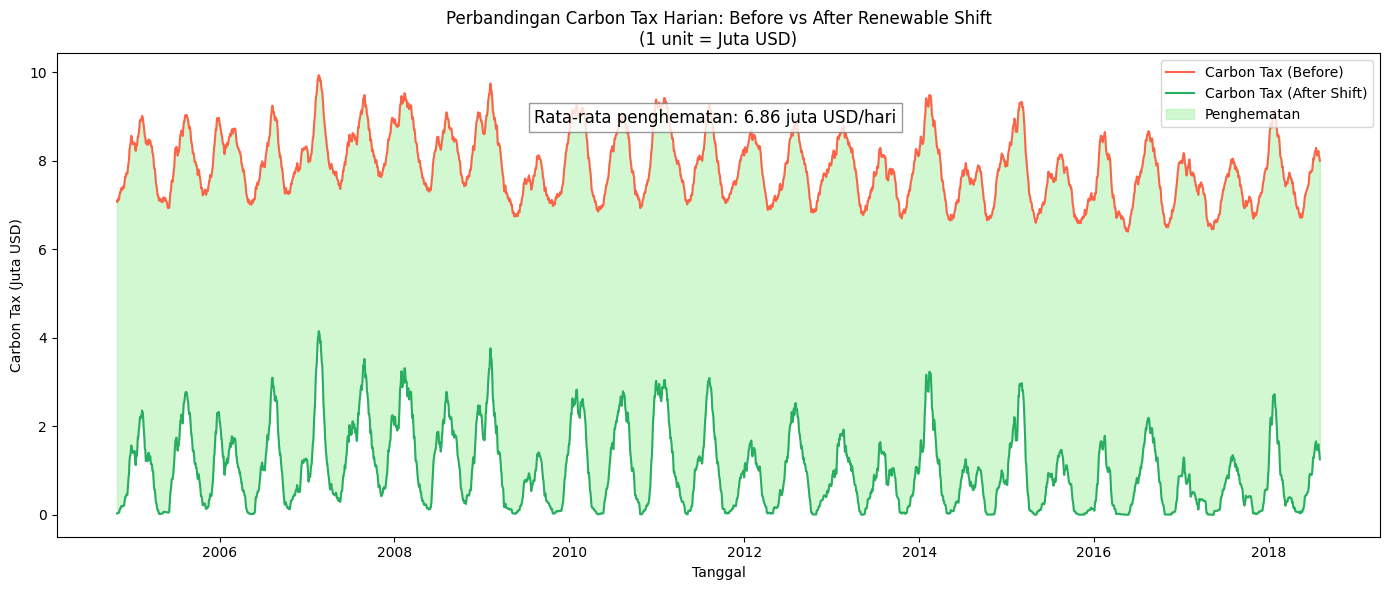

In [39]:
import matplotlib.pyplot as plt

# Hitung rata-rata penghematan harian
avg_saving = daily_tax['Saving'].mean() / 1e6  # dalam juta USD

# Ambil tanggal tengah untuk posisi teks
mid_date = daily_tax.index[len(daily_tax) // 2]

# Plot grafik dengan semua elemen
plt.figure(figsize=(14, 6))
plt.plot(daily_tax_smooth.index, daily_tax_smooth['Tax_Before'] / 1e6, label='Carbon Tax (Before)', color='tomato')
plt.plot(daily_tax_smooth.index, daily_tax_smooth['Tax_After'] / 1e6, label='Carbon Tax (After Shift)', color='#27ae60')
plt.fill_between(
    daily_tax_smooth.index,
    daily_tax_smooth['Tax_Before'] / 1e6,
    daily_tax_smooth['Tax_After'] / 1e6,
    color='lightgreen', alpha=0.4, label='Penghematan'
)

# Tambahkan teks rata-rata penghematan
plt.text(pd.to_datetime(mid_date), avg_saving + 2,  # Y bisa kamu sesuaikan biar kelihatan
         f'Rata-rata penghematan: {avg_saving:.2f} juta USD/hari',
         fontsize=12, color='black', ha='center', bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

plt.title('Perbandingan Carbon Tax Harian: Before vs After Renewable Shift\n(1 unit = Juta USD)')
plt.xlabel('Tanggal')
plt.ylabel('Carbon Tax (Juta USD)')
plt.legend(loc='upper right')
plt.grid(False)
plt.tight_layout()
plt.show()


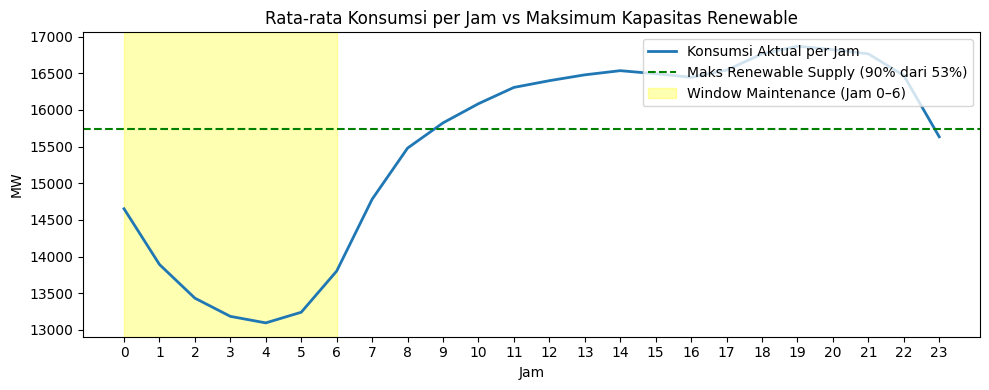

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kalkulasi batas renewable
renewable_limit = 33010 * 0.53 * 0.9  # 90% dari 53% kapasitas total

# Plot konsumsi per jam
plt.figure(figsize=(10, 4))
sns.lineplot(x=hourly_pattern.index, y=hourly_pattern.values, label='Konsumsi Aktual per Jam', linewidth=2)

# Garis horizontal kapasitas renewable
plt.axhline(y=renewable_limit, color='green', linestyle='--', label='Maks Renewable Supply (90% dari 53%)')

# Highlight jam 0–6
plt.axvspan(0, 6, color='yellow', alpha=0.3, label='Window Maintenance (Jam 0–6)')

# Labeling
plt.title('Rata-rata Konsumsi per Jam vs Maksimum Kapasitas Renewable')
plt.xlabel('Jam')
plt.ylabel('MW')
plt.xticks(range(24))
plt.legend(loc='upper right')
plt.grid(False)
plt.tight_layout()
plt.show()


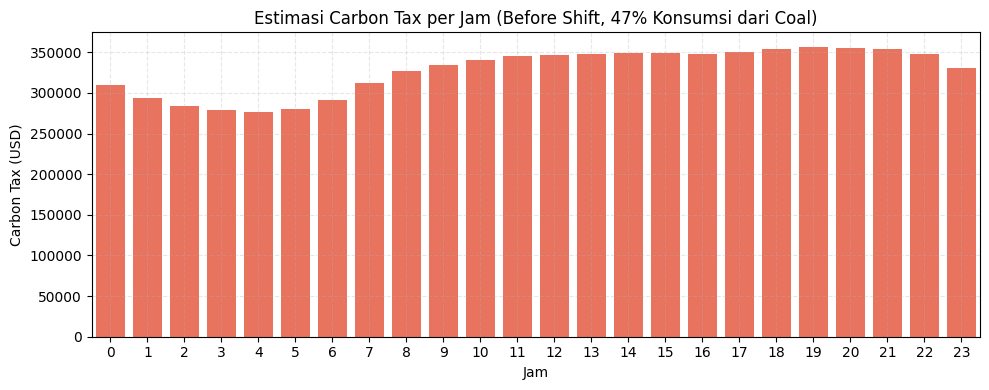

In [27]:
# Emisi dan carbon tax untuk kondisi BEFORE SHIFT (47% konsumsi dari coal)
coal_emission_factor = 0.9  # ton CO2 per MW
carbon_tax_rate = 50        # USD per ton CO2

# Hitung per jam rata-rata (dari hourly pattern)
hourly_coal_MW = hourly_pattern * 0.47
hourly_emission_ton = hourly_coal_MW * coal_emission_factor
hourly_carbon_tax = hourly_emission_ton * carbon_tax_rate  # dalam USD

# Plot bar chart pajak karbon per jam (Before Shift)
plt.figure(figsize=(10, 4))
sns.barplot(x=hourly_carbon_tax.index, y=hourly_carbon_tax.values, color='tomato')

plt.title('Estimasi Carbon Tax per Jam (Before Shift, 47% Konsumsi dari Coal)')
plt.xlabel('Jam')
plt.ylabel('Carbon Tax (USD)')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


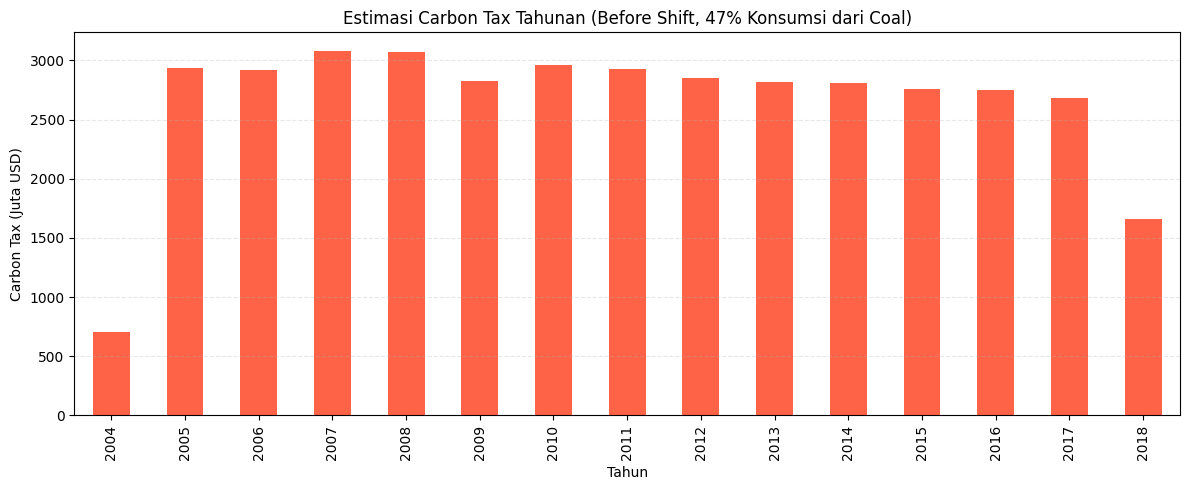

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# Asumsi tetap
coal_share = 0.47
emission_factor = 0.9  # ton CO2 per MW dari coal
carbon_tax_rate = 50   # USD per ton CO2

# Pastikan datetime
df['Datetime'] = pd.to_datetime(df['Datetime'])
df['date'] = df['Datetime'].dt.date

# Hitung konsumsi dari coal (before shift)
df['Coal_MW_before'] = df['AEP_MW'] * coal_share
df['CO2_ton_before'] = df['Coal_MW_before'] * emission_factor
df['Carbon_Tax_before'] = df['CO2_ton_before'] * carbon_tax_rate

# Agregasi tahunan
yearly_tax_before = df.groupby('Year')['Carbon_Tax_before'].sum() / 1e6  # dalam juta USD

# Plot
plt.figure(figsize=(12, 5))
yearly_tax_before.plot(kind='bar', color='tomato')

plt.title('Estimasi Carbon Tax Tahunan (Before Shift, 47% Konsumsi dari Coal)')
plt.ylabel('Carbon Tax (Juta USD)')
plt.xlabel('Tahun')
plt.grid(True, axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


In [29]:
# Ulangi parameter tetap
total_capacity = 33010  # MW
renewable_share = 0.53
max_renewable_capacity = total_capacity * renewable_share
usable_renewable_capacity = max_renewable_capacity * 0.90  # 90% utilisasi

emission_factor = 0.9     # ton CO2 per MW dari coal
carbon_tax_rate = 50      # USD per ton CO2

# Hitung energi yang bisa ditutup oleh renewable
df['From_Renewable'] = df['AEP_MW'].clip(upper=usable_renewable_capacity)
df['From_Coal_after'] = (df['AEP_MW'] - df['From_Renewable']).clip(lower=0)

# Hitung emisi dan pajak karbon after shift
df['CO2_ton_after'] = df['From_Coal_after'] * emission_factor
df['Carbon_Tax_after'] = df['CO2_ton_after'] * carbon_tax_rate

# Agregasi tahunan
df['Date'] = df['Datetime'].dt.date
yearly_tax_after = df.groupby('Date')['Carbon_Tax_after'].sum() / 1e6  # dalam juta USD

# Plot
plt.figure(figsize=(12, 5))
yearly_tax_after.plot(kind='bar', color='seagreen')

plt.title('Estimasi Carbon Tax Harian (After Shift: 90% dari 53% Renewable Capacity)')
plt.ylabel('Carbon Tax (Juta USD)')
plt.xlabel('Tahun')
plt.grid(True, axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


KeyboardInterrupt: 

In [35]:
# Asumsi tetap
total_capacity = 33010
renewable_share = 0.53
usable_renewable_capacity = total_capacity * renewable_share * 0.90

emission_factor = 0.9      # ton CO2 per MW
carbon_tax_rate = 50       # USD per ton CO2

# Before shift: 47% dari konsumsi per jam dianggap dari coal
df['Carbon_Tax_Before'] = df['AEP_MW'] * 0.47 * emission_factor * carbon_tax_rate

# After shift: hanya sisa dari konsumsi setelah renewable
df['From_Renewable'] = df['AEP_MW'].clip(upper=usable_renewable_capacity)
df['From_Coal_After'] = (df['AEP_MW'] - df['From_Renewable']).clip(lower=0)
df['Carbon_Tax_After'] = df['From_Coal_After'] * emission_factor * carbon_tax_rate

# Tambahkan kolom tanggal
df['Date'] = df['Datetime'].dt.date

# Agregasi harian
daily_tax = df.groupby('Date')[['Carbon_Tax_Before', 'Carbon_Tax_After']].sum()
daily_tax['Saving'] = daily_tax['Carbon_Tax_Before'] - daily_tax['Carbon_Tax_After']

# Optional: smoothing (biar nggak terlalu zig-zag)
daily_tax_smooth = daily_tax.rolling(window=30).mean() / 1e6  # juta USD


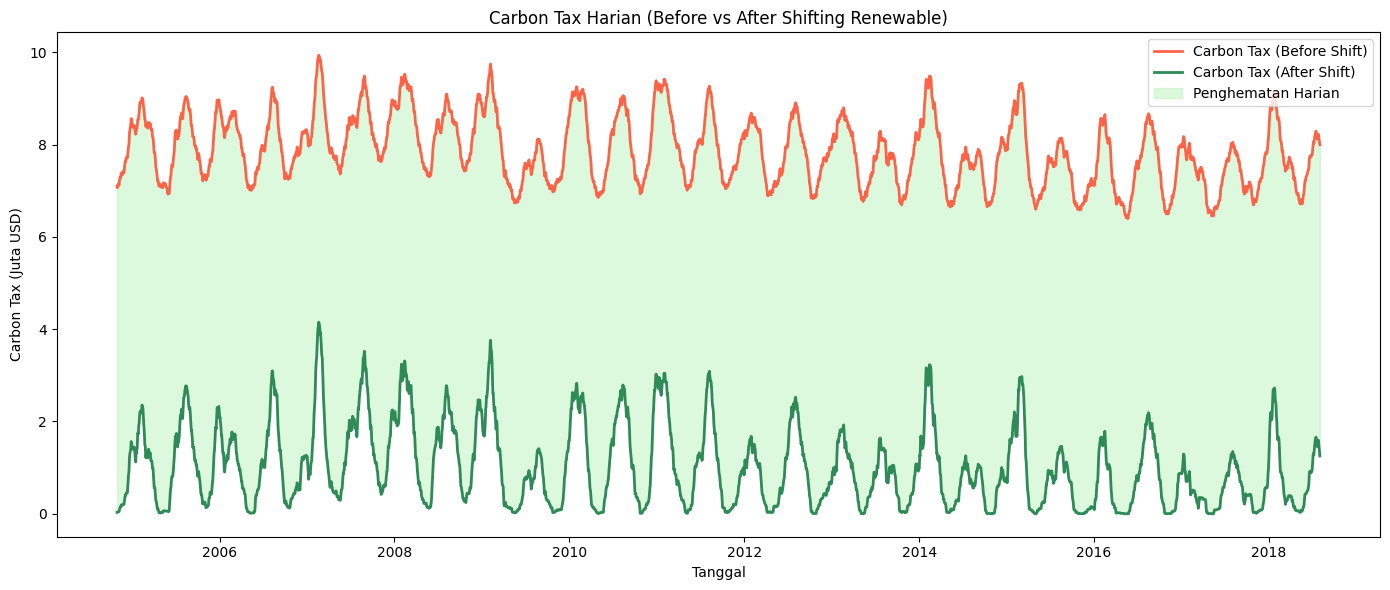

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(daily_tax_smooth.index, daily_tax_smooth['Carbon_Tax_Before'], 
         label='Carbon Tax (Before Shift)', color='tomato', linewidth=2)
plt.plot(daily_tax_smooth.index, daily_tax_smooth['Carbon_Tax_After'], 
         label='Carbon Tax (After Shift)', color='seagreen', linewidth=2)

plt.fill_between(daily_tax_smooth.index,
                 daily_tax_smooth['Carbon_Tax_Before'],
                 daily_tax_smooth['Carbon_Tax_After'],
                 color='lightgreen', alpha=0.3, label='Penghematan Harian')

plt.title('Carbon Tax Harian (Before vs After Shifting Renewable)')
plt.ylabel('Carbon Tax (Juta USD)')
plt.xlabel('Tanggal')
plt.legend(loc='upper right')
plt.grid(False)
plt.tight_layout()
plt.show()
